![ieseg logo](./img/ieseg.png)

#### MBD 2020-2021
# Statistical & Machine Learning Approaches for Marketing

## Homework for Session 5

### Chapter 9 (Exercise 1) - Conceptual Question [Page 368]

1. This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points for which 1 + 3X1 − X2 < 0.

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0. Indicate the set of points for which −2 + X1 + 2X2 > 0, as well as the set of points for which −2 + X1 + 2X2 < 0. 

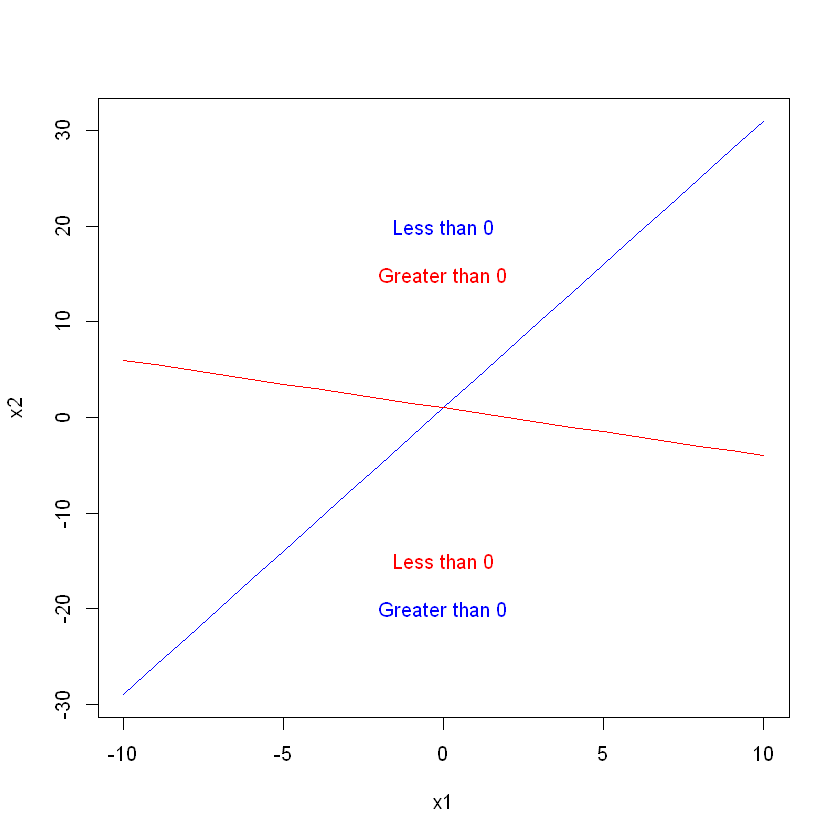

In [1]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "blue")
text(c(0), c(-20), "Greater than 0", col = "blue")
text(c(0), c(20), "Less than 0", col = "blue")
lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "red")
text(c(0), c(15), "Greater than 0", col = "red")

### Chapter 9 (Exercise 2) - Conceptual Question - [Page 368]

We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0 + β1X1 + β2X2 = 0. We now investigate a non-linear decision boundary.

(a) Sketch the curve (1 + X1)2 +(2 − X2)2 = 4.

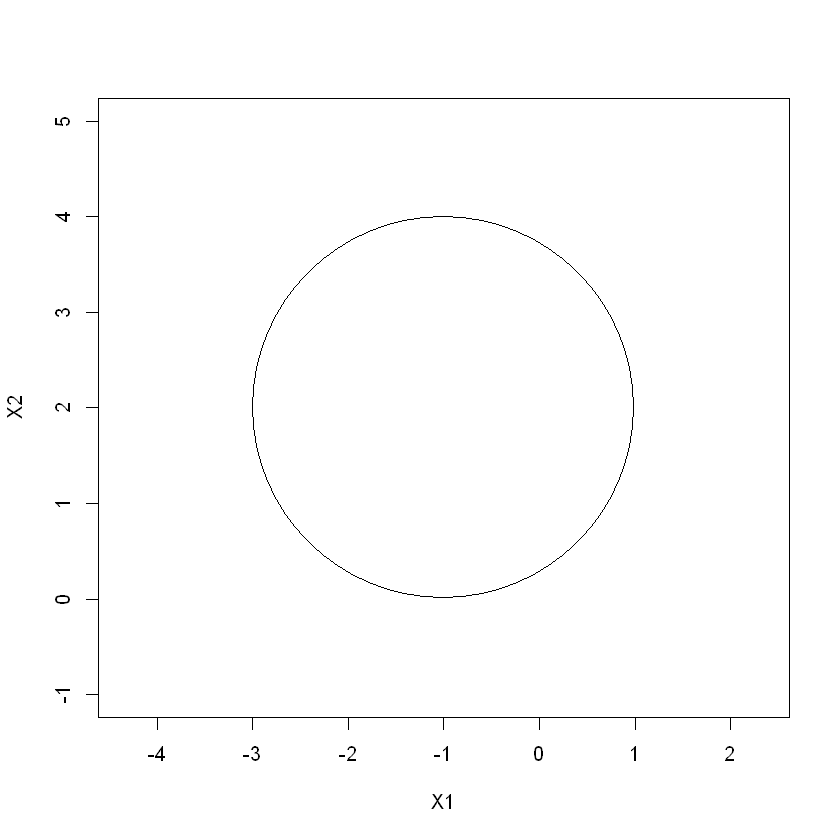

In [2]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

(b) On your sketch, indicate the set of points for which (1 + X1)2 + (2 − X2)2 > 4, as well as the set of points for which (1 + X1)2 + (2 − X2)2 ≤ 4.

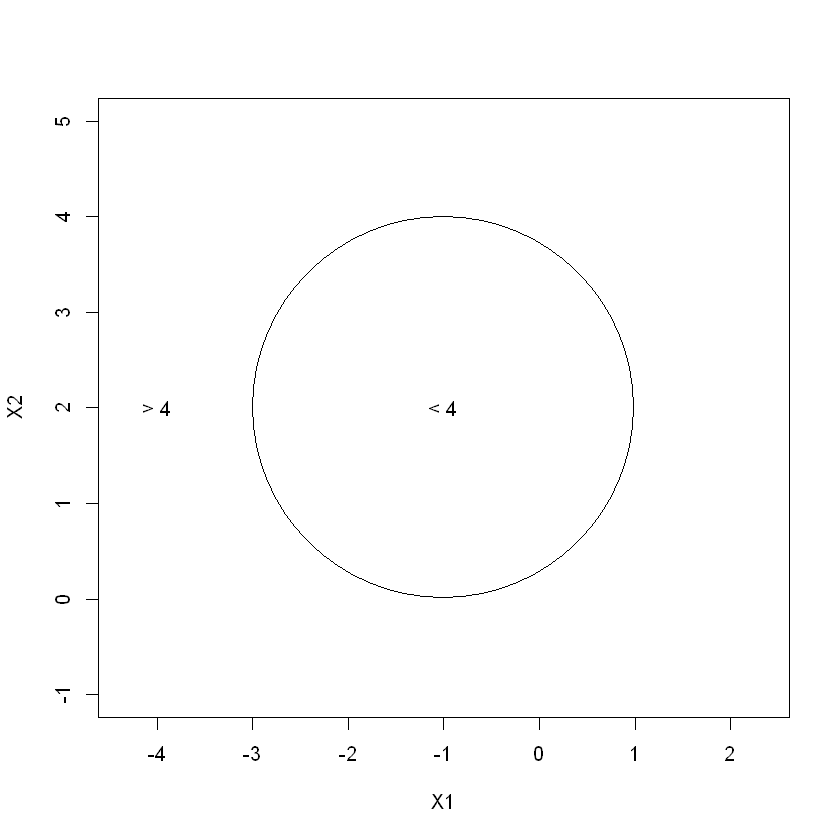

In [3]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

(c) Suppose that a classifier assigns an observation to the blue class if (1 + X1)2 + (2 − X2)2 > 4, and to the red class otherwise. To what class is the observation (0,0) classified? (−1,1)? (2,2)? (3,8)?

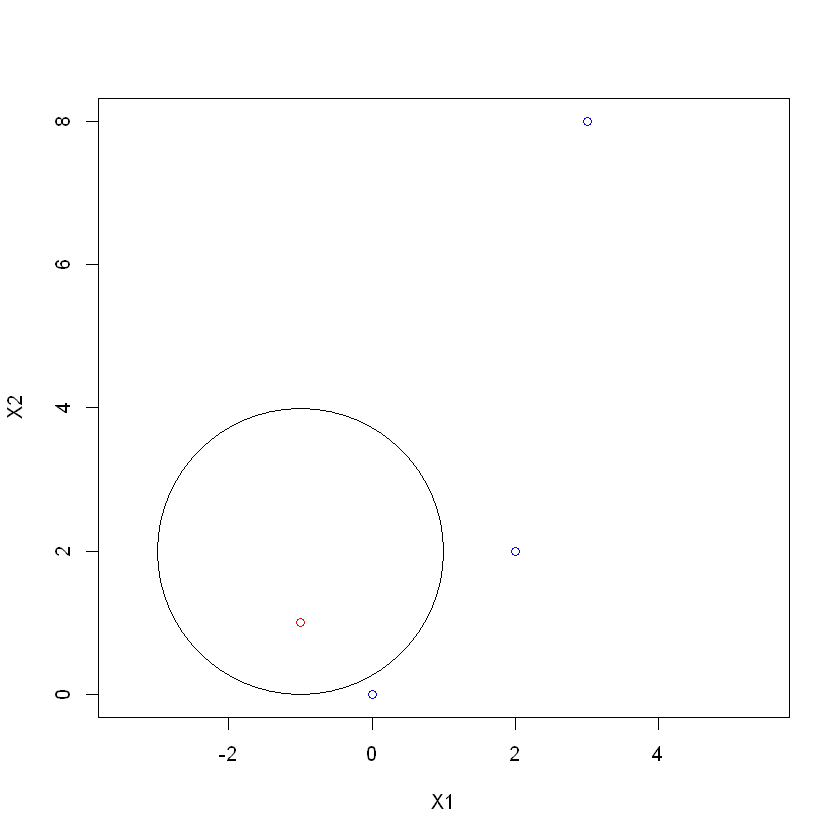

In [4]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

(d) Argue that while the decision boundary in (c) is not linear interms of X1 and X2, it is linear in terms of X1, X21, X2, and X22.

(1 + X1)2 + (2 − X2)2 = 4   AND    X21 + X22 + 2X1 − 4X2 + 1=0 are both linear equations.

### Chapter 9 (Exercise 4) - Applied Question [Page 369]

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will out perform a support vector classifier on the train-ing data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [5]:
library(tibble)
set.seed(1)
q4_data <- tibble(
    X1 = rnorm(100),
    X2 = rnorm(100)
)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

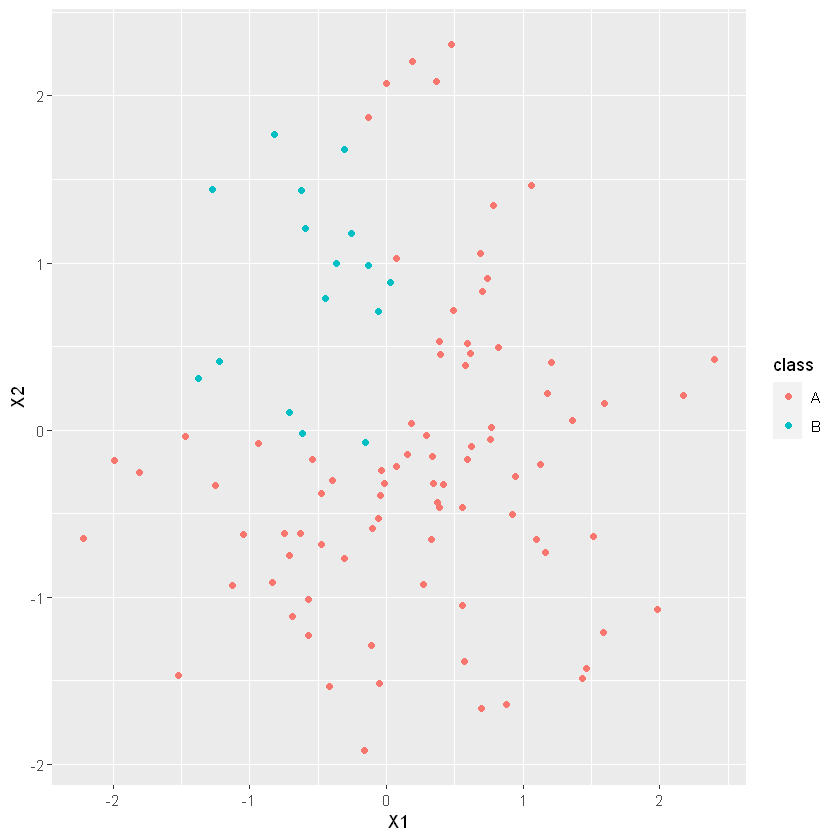

In [6]:
library(dplyr)
library(ggplot2)
q4_data %>%
    mutate(
        class = as.factor(ifelse(-X1 + X2 - (X1 + X2)^2 < 0, 'A', 'B'))
    ) -> q4_data_class

q4_data_class %>%
    ggplot() +
    geom_point(aes(X1, X2, colour = class))

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v tidyr   0.8.3     v purrr   0.3.2
v readr   1.3.1     v stringr 1.4.0
v tidyr   0.8.3     v forcats 0.4.0
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'e1071' was built under R version 3.6.3"

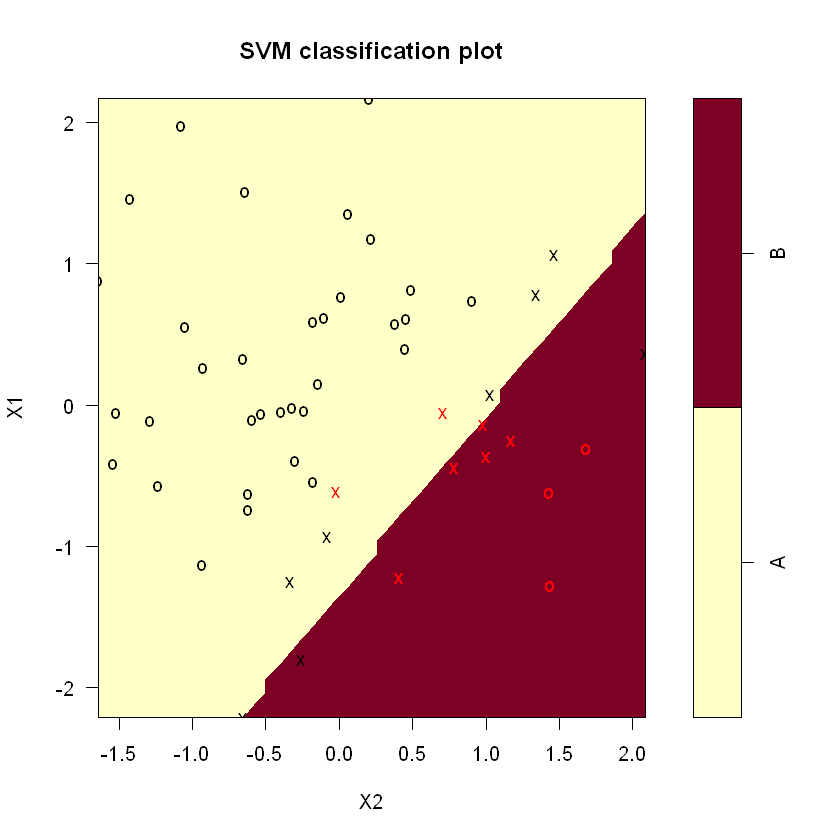

In [7]:
library(tidyverse)
library(modelr)
library(e1071)
set.seed(1)
q4_data_partition <- q4_data_class %>% resample_partition(c(test = .5, train = .5))

q4_data_partition$train %>%
    svm(class ~ ., data = ., scale = F, cost = 10, kernel = 'linear') -> svc_fit

svc_fit %>% plot(data = as_tibble(q4_data_partition$train))

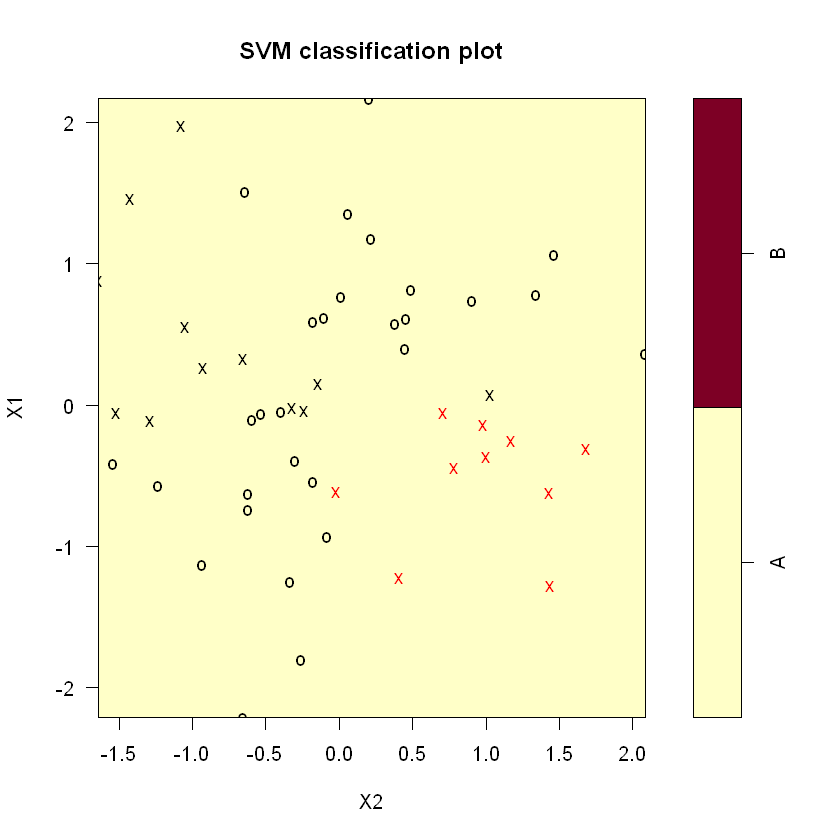

In [9]:
q4_data_partition$train %>%
        svm(class ~ ., data = ., scale = F, cost = 10, kernel = 'polynomial', degree = 2) -> svm_poly_fit

svm_poly_fit %>% plot(data = as_tibble(q4_data_partition$train))

In [10]:
library(knitr)
q4_data_partition$train %>%
    as_tibble() %>%
    mutate(
        svc_pred = predict(svc_fit, newdata = .),
        svm_pred = predict(svm_poly_fit, newdata = .)
    ) %>%
    summarise(
        'SVC Training Error Rate' = mean(class != svc_pred) * 100,
        'SVM Training Error Rate' = mean(class != svm_pred) * 100
    )

SVC Training Error Rate,SVM Training Error Rate
9.803922,19.60784


In [11]:
q4_data_partition$test %>%
    as_tibble() %>%
    mutate(
        svc_pred = predict(svc_fit, newdata = .),
        svm_pred = predict(svm_poly_fit, newdata = .)
    ) %>%
    summarise(
        'SVC Test Error Rate' = mean(class != svc_pred) * 100,
        'SVM Test Error Rate' = mean(class != svm_pred) * 100
    ) 

SVC Test Error Rate,SVM Test Error Rate
18.36735,12.2449


Test error rate is more on non-linear SVM, but train error is higher. 

### Chapter 9 (Exercise 7) - Applied Question - [Page 371]

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [12]:
library(ISLR)
mileage.median <- median(Auto$mpg)
Auto$mb <- ifelse(Auto$mpg > mileage.median, 1, 0)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [13]:
set.seed(1)
    Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'linear',
        ranges = list(cost = c(0.01, 0.1, 1, 10, 100))
    ) -> auto_svc

summary(auto_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.07424404 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.08379323 0.02362659
2 1e-01 0.07898470 0.02693908
3 1e+00 0.07424404 0.02693697
4 1e+01 0.08874314 0.03324316
5 1e+02 0.11389623 0.03717388


(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [14]:
set.seed(1)
Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'radial',
        ranges = list(gamma = c(0.01, 0.1, 1, 10, 100), cost = c(.01, .1, 1, 10))
    ) -> auto_svm_radial

summary(auto_svm_radial)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1   10

- best performance: 0.03829745 

- Detailed performance results:
   gamma  cost      error  dispersion
1  1e-02  0.01 0.26312988 0.031737658
2  1e-01  0.01 0.13202665 0.019147617
3  1e+00  0.01 0.47500755 0.039396393
4  1e+01  0.01 0.49346832 0.039108911
5  1e+02  0.01 0.49379134 0.038893492
6  1e-02  0.10 0.08373932 0.020138418
7  1e-01  0.10 0.05634252 0.019269324
8  1e+00  0.10 0.29778767 0.037143518
9  1e+01  0.10 0.44935116 0.037083089
10 1e+02  0.10 0.45190362 0.035952200
11 1e-02  1.00 0.07165482 0.022854796
12 1e-01  1.00 0.04562751 0.018954805
13 1e+00  1.00 0.09787485 0.016102436
14 1e+01  1.00 0.24525564 0.003593490
15 1e+02  1.00 0.25090350 0.001405532
16 1e-02 10.00 0.06176359 0.022313373
17 1e-01 10.00 0.03829745 0.021903229
18 1e+00 10.00 0.09967585 0.015721409
19 1e+01 10.00 0.24525584 0.003593308
20 1e+02 10.00 0.25090350 0.001405532


In [15]:
Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'polynomial',
        ranges = list(degree = seq(2, 5), cost = c(.01, .1, 1, 10))
    ) -> auto_svm_poly

summary(auto_svm_poly)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      2   10

- best performance: 0.3970275 

- Detailed performance results:
   degree  cost     error dispersion
1       2  0.01 0.5439966 0.05714637
2       3  0.01 0.5440907 0.05713281
3       4  0.01 0.5441723 0.05712482
4       5  0.01 0.5441731 0.05712475
5       2  0.10 0.5423710 0.05735016
6       3  0.10 0.5433474 0.05720586
7       4  0.10 0.5441633 0.05712598
8       5  0.10 0.5441714 0.05712519
9       2  1.00 0.5260761 0.05963162
10      3  1.00 0.5358104 0.05796303
11      4  1.00 0.5440734 0.05713754
12      5  1.00 0.5441545 0.05712965
13      2 10.00 0.3970275 0.07660571
14      3 10.00 0.4652288 0.06531582
15      4 10.00 0.5431525 0.05727081
16      5 10.00 0.5439858 0.05717423


(d) Make some plots to back up your assertions in (b) and (c). Hint: In the lab, we used the plot()function for svm objects only in cases with p=2. When p > 2, you can use the plot() function to create plots displaying pairs of variables at a time. Essentially, instead of typing "plot(svmfit, dat)" where svmfit contains your fitted model and dat is a dataframe containing your data, you can type "plot(svmfit, dat, x1∼x4)" in order to plot just the first and fourth variables. However, you must replace x1 and x4 with the correct variable names. To find out more, type "?plot.svm".

In [16]:
svm_linear <- svm(mb ~ ., data = Auto, kernel = 'linear', cost = 1)
svm_poly <- svm(mb ~ ., data = Auto, kernel = 'polynomial', degree = 2, cost = 10)
svm_radial <- svm(mb ~ ., data = Auto, kernel = 'radial', gamma = 0.01, cost = 10)

plot_pairs <- function(fit, data, dependent, independents) {
    for (independent in independents) {
        formula = as.formula( str_c( dependent, '~', independent) )
        plot(fit, data, formula)
    }
}

plot_pairs(svm_linear, Auto, 'mpg', c('acceleration', 'displacement', 'horsepower'))

In [17]:
plot_pairs(svm_poly, Auto, 'mpg', c('acceleration', 'displacement', 'horsepower'))

In [18]:
svm.linear = svm(mb ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mb ~ ., data = Auto, kernel = "polynomial", cost = 10, degree = 2)
svm.radial = svm(mb ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

### Chapter 9 (Exercise 8) - Applied Question [Page 371]

This problem involves the OJ dataset which is part of the ISLR package.

(a) Create a training set containing a random sample of 800 observations,  and  a  test  set  containing  the  remaining observations.

In [19]:
library(ISLR)
set.seed(1)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

(b) Fit a support vector classifier to the training data using cost = 0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

In [20]:
library(e1071)
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




(c) What are the training and test error rates?

In [21]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 420  65
  MM  75 240

In [22]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  33  69

(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [23]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", 
                ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.17125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17375 0.03884174
2   0.01778279 0.17500 0.03996526
3   0.03162278 0.17750 0.03717451
4   0.05623413 0.18000 0.03073181
5   0.10000000 0.17875 0.03064696
6   0.17782794 0.17875 0.03537988
7   0.31622777 0.17875 0.03438447
8   0.56234133 0.17625 0.03197764
9   1.00000000 0.17500 0.03061862
10  1.77827941 0.17375 0.02972676
11  3.16227766 0.17250 0.03270236
12  5.62341325 0.17250 0.03322900
13 10.00000000 0.17125 0.03488573


(e) Compute the training and test error rates using this new value for cost.

In [24]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 423  62
  MM  69 246

In [25]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 156  12
  MM  28  74

(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [26]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [27]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  44
  MM  77 238

In [28]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

In [29]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial",ranges =list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.17125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39375 0.06568284
2   0.01778279 0.39375 0.06568284
3   0.03162278 0.35125 0.09137263
4   0.05623413 0.19500 0.05109903
5   0.10000000 0.18250 0.05470883
6   0.17782794 0.17625 0.04059026
7   0.31622777 0.17250 0.04518481
8   0.56234133 0.17125 0.04825065
9   1.00000000 0.17625 0.03793727
10  1.77827941 0.17750 0.03622844
11  3.16227766 0.18375 0.03866254
12  5.62341325 0.18250 0.04090979
13 10.00000000 0.18125 0.04340139


In [30]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 437  48
  MM  71 244

In [31]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 150  18
  MM  30  72

(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [32]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [33]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 449  36
  MM 110 205

In [34]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  45  57

In [35]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2,ranges =list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.18375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.08287373
2   0.01778279 0.37125 0.07337357
3   0.03162278 0.36750 0.06269414
4   0.05623413 0.34625 0.05434266
5   0.10000000 0.32375 0.06730166
6   0.17782794 0.25250 0.07260051
7   0.31622777 0.20875 0.05894029
8   0.56234133 0.20625 0.05472469
9   1.00000000 0.20000 0.05137012
10  1.77827941 0.19500 0.05809475
11  3.16227766 0.18875 0.05816941
12  5.62341325 0.18375 0.04825065
13 10.00000000 0.18625 0.05185785


In [36]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2,cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 447  38
  MM  88 227

(h) Overall, which approach seems to give the best results on this data?

As SVM with radial kernel has the Lowest Test Error Rate, thus we can say that it seems to be the best approach